In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

In [9]:
pwd

'/content'

In [62]:
df = pd.read_csv('/content/water_potability.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [64]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [65]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [66]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# Create a pandas profiling report
profile = ProfileReport(df)
profile

In [67]:
#finding missing values
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
df.value_counts('Hardness')

Hardness
47.432000     1
209.746771    1
209.609618    1
209.619214    1
209.625601    1
             ..
184.309222    1
184.328693    1
184.373232    1
184.385124    1
323.124000    1
Length: 3276, dtype: int64

In [19]:
#df.value_counts(dropna=False)

In [68]:
df.drop_duplicates(inplace=True) #removing duplicates

In [69]:
#Replace the missing values for numerical columns with mean
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [23]:
df['ph'].value_counts()

7.080795    491
8.554097      1
6.538084      1
5.915807      1
8.136498      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: ph, Length: 2786, dtype: int64

In [72]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [73]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [74]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


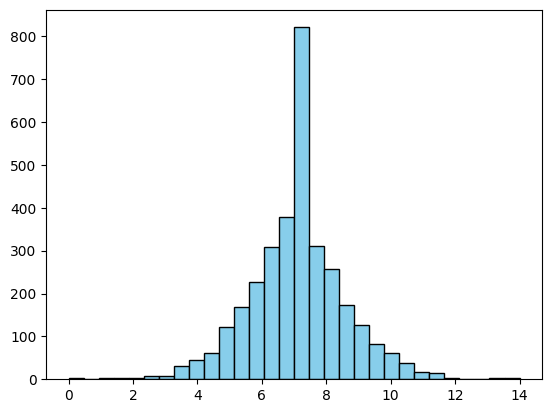

In [124]:
#plt.figure(figs)
plt.hist(df.ph, bins=30, color='skyblue', edgecolor='black')
plt.show()

In [ ]:
sns.set(style='whitegrid')
sns.scatterplot(x='ph', y='Solids', data=df)
plt.show()

In [75]:
X = df.drop(['Potability'], axis=1).values  # Features
y = df['Potability'].values  # Target variable


In [105]:
# Splitting the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [106]:
# Scaling the features
from sklearn.preprocessing import StandardScaler


In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=20, shuffle=True)

In [109]:
from sklearn import svm

In [110]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [111]:
# Making predictions on the test set

y_pred = clf.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6678291194420227


In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       680
           1       0.76      0.27      0.40       467

    accuracy                           0.67      1147
   macro avg       0.71      0.61      0.58      1147
weighted avg       0.70      0.67      0.62      1147



In [116]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [117]:
y_test

array([1, 0, 1, ..., 0, 0, 1])

In [118]:
confusion_matrix(y_test, y_pred)

array([[640,  40],
       [341, 126]])

In [119]:
import seaborn as sns

<Axes: xlabel='Predicted', ylabel='Actual'>

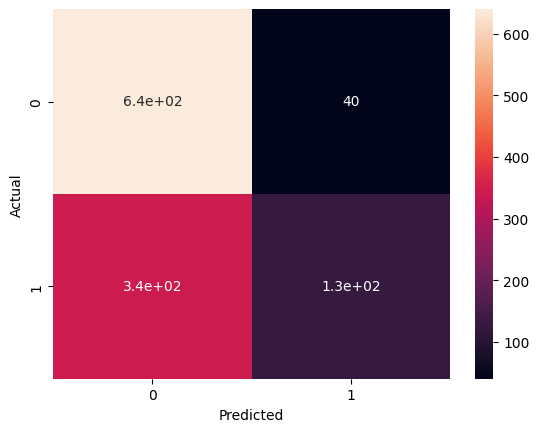

In [120]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [121]:
for i in range(len(y_pred)):
  print(f"Prediction is {y_pred[i]} : Actual is {y_test[i]}")

Prediction is 1 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 1 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 1 : Actual is 0
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 1
Prediction is 1 : Actual is 1
Prediction is 1 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction is 1 : Actual is 1
Prediction is 0 : Actual is 0
Prediction is 0 : Actual is 0
Prediction

In [123]:
import pickle

pickle.dump(clf, open ('model.sav', 'wb'))